In [17]:
import importlib
import PreProcessMetadata
import PreProcess_NLP
import KG
#importlib.reload(KG)
import pathlib
from rdflib import Graph, Literal

In [4]:
#Angabe allgemeiner Parameter zum Ausführen der Funktionen (einmalig)
pdf_path = ('C:/Users/Jana/LabCode/PDF')
p = pathlib.Path(pdf_path)
files_path = list(p.glob('*.pdf'))

pdf_path_conference = ('C:/Users/Jana/LabCode/AimsAndScope')
p_conference = pathlib.Path(pdf_path_conference)
files_path_conference = list(p_conference.glob('*.pdf'))

path = 'C:/Users/Jana/LabCode/'

In [5]:
#Aufrufe aus PreProcessMetadata
df_pdf_meta = PreProcessMetadata.read_paper_meta(path) #Einlesen der PDF's

In [4]:
#muss nur ausgeführt werden, falls neue paper/Konferenzen dazu kommen
PreProcessMetadata.write_paper_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (paper)
PreProcessMetadata.write_conference_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (Konferenzen)

In [6]:
#Aufrufe aus PreProcess_NLP
corpus = PreProcess_NLP.build_corpus(files_path) #Bildung des Textcorpus aus papern
conference_corpus = PreProcess_NLP.build_conference(files_path_conference) #Bildung des Textcorpus aus Konferenzen
keyword_list, conference_list = PreProcess_NLP.generate_keywords(corpus, conference_corpus) #Generierung keywords

In [14]:
#Initialerstellung Graph (gerichtet)
G_KG = Graph()
G_KG = KG.get_entity_rel(df_pdf_meta, G_KG, keyword_list, conference_list)#Erstellung Inhalt Graph

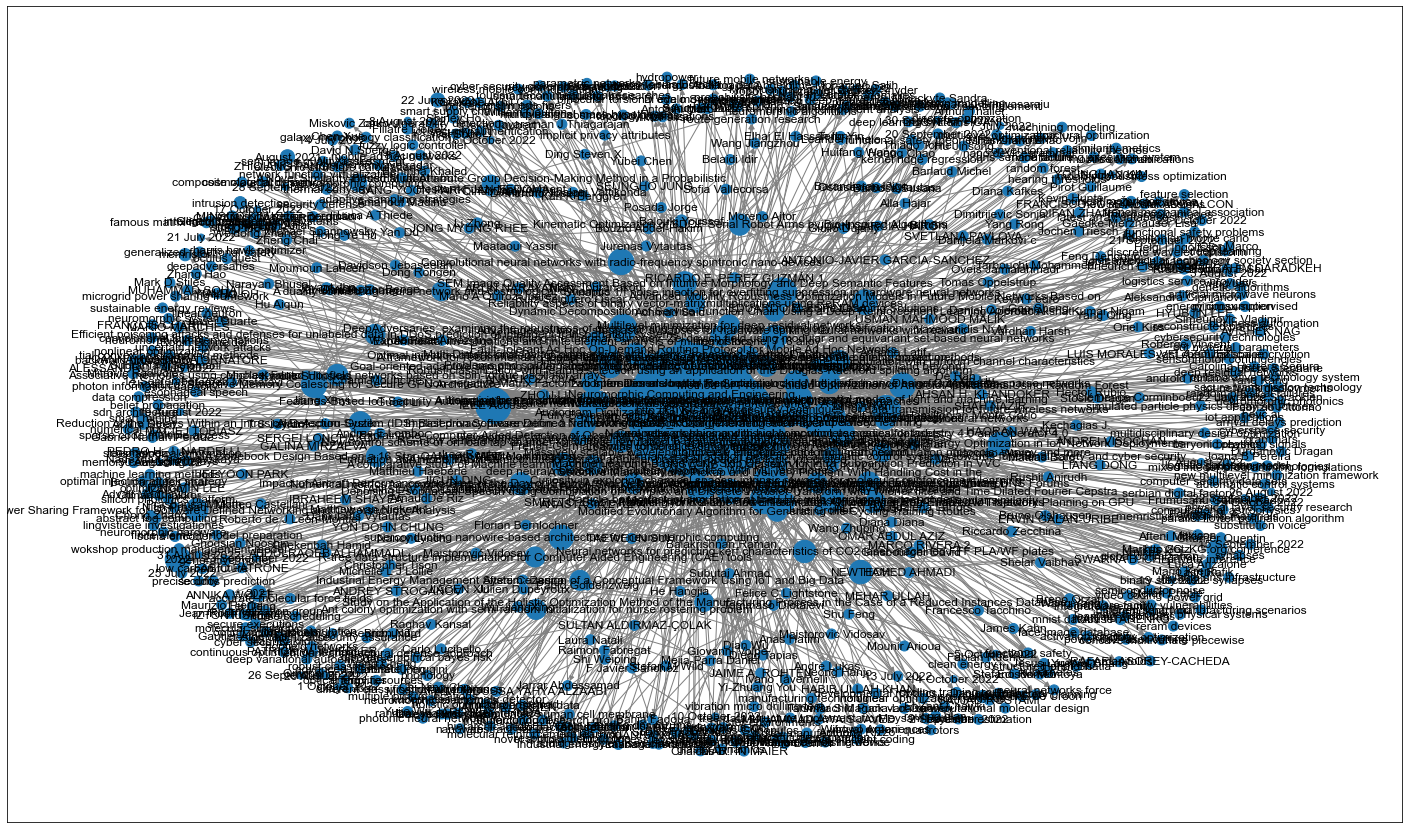

In [15]:
#Anzeigen des Graphen
KG.show_graph(G_KG)

In [19]:

if (Literal('Audiogram Digitization Tool for Audiological Reports'), None, None) in G_KG:
    print("This graph contains triples about that!")
    

This graph contains triples about that!


In [21]:


# Query the data in g using SPARQL
# This query returns the 'name' of all ``foaf:Person`` instances
q = """
    PREFIX n: <http://G_KG.org/>

    SELECT ?Autor
    WHERE {
        ?Autor rdf:type n:Autor .

    }
"""

# Apply the query to the graph and iterate through results
for r in G_KG.query(q):
    print(r["rdf:type"])
print(G_KG.query(q))

In [24]:
G_RDF = G_KG.serialize(format="turtle")
print(G_RDF)

@prefix n: <http://G_KG.org/> .
@prefix ns1: <http://purl.org/dc/elements/1.1/> .
@prefix ns2: <http://xmlns.com/foaf/0.1/> .

n:Autor ns2:name "ABDULRAQEB ALHAMMADI",
        "AHSAN H. KHANDOKER",
        "ALEN RAJŠP",
        "ALESSANDRO FAUSTO",
        "ANASTASIA LYUPA",
        "ANDREI VISOCHAN",
        "ANDREY STROGANOV",
        "ANNA KOZLOVA",
        "ANNIKA WOLFF",
        "ANTONIO-JAVIER GARCIA-SANCHEZ",
        "ARUN NARAYANAN",
        "AVISHEK NAG",
        "Abdelgader Abdeldime Mohamed Salih",
        "Achim Streit",
        "Achmad Said",
        "Adnane Latif",
        "Advait Madhavan",
        "Afteni Cezarina",
        "Afteni Mitica",
        "AkshatKumar Nigam",
        "Aleksandra Ćiprijanovi",
        "Alice Mizrahi",
        "Alla Hajar",
        "Alán Aspuru-Guzik",
        "Amarjouf Madiha",
        "Anas Hatim",
        "Andre Lukas",
        "Andres E Lombo",
        "Anirudh Nihalani Vattikonda",
        "Anthony Rizzo",
        "Antonini Marc",
        "